In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

Теплофизические свойства

In [3]:
T = 59.4 #Температура Новека при сборе статистических данных
Cp = 2 * T + 1133 #Дж/кг*К - вода
r = 125000 #Дж/кг
ρ_w = -2.692 * T + 1582 #кг/м3- novec
ρ_v = 0.0034 * (T ** 2) - 0.103 * T + 2.333 #кг/м3 - пар
η = 0.0003 # Н*c/м2 - динамическая 
λ = 0.06
g = 9.81
ν = η / ρ_w #м2/с - кинематическая
σ = 0.0136 #Н/м - поверхностное натяжение
ΔT = 5

In [4]:
Ja = (Cp * ΔT * ρ_w) / (r * ρ_v)
Ja0 = (Cp * ρ_w) / (r * ρ_v)
Pr = (η * Cp) / λ
Ar = (g / (ν ** 2)) * ((σ / (g * ρ_w)) ** (3 / 2))
K = ((Ja / Pr) ** 2) / Ar
Ar

212175.72005334112

Обработка экспериментальных данных

In [5]:
tests = pd.read_csv('experimental data.csv', sep=';')
tests

,Замер,"D mean, mkm","Напряжение, В","Сила тока, А","Температура, °С","Мощность, Вт",Плотность
0,regstat1,389,"1,523","14,4",NaN,"21,9312","7760,509554"
1,regstat2,478,"1,95",23,NaN,"44,85","15870,48832"
2,regstat3,560,"2,555",37,NaN,"94,535","33451,87544"
3,regstat4,1002,3,54,NaN,162,"57324,84076"
4,regstat5,1170,"3,49",69,NaN,"240,81","85212,31423"
5,regstat6,542,"2,24","23,3",NaN,"52,192","18468,50672"
6,regstat7,825,"2,72",41,NaN,"111,52","39462,1373"
7,regstat8,1168,"3,25","67,2",NaN,"218,4","77282,37792"
8,regstat9,647,"2,267","32,6",NaN,"73,9042","26151,52159"
9,regstat10,822,"2,54","41,3",NaN,"104,902","37120,31139"


In [6]:
tests = tests.set_index('Замер')
tests = tests.replace(',', '.', regex=True)
tests = tests.astype(float)

In [7]:
tests = tests.drop(columns='Температура, °С')

In [8]:
tests.columns = ['D mean, mkm', 'U, V', 'I, A', 'P, W', 'q, W/m2']
tests['ΔT'] = (tests['q, W/m2'] ** 0.3) / 3

In [9]:
tests = tests.rename(columns={'D mean, mkm' : 'D0, mkm'})

In [10]:
tests = tests.drop(index=['regstat5', 'regstat8', 'regstat4', 'regstat7', 'regstat10'])

(4.0, 8.0, 200.0, 800.0)

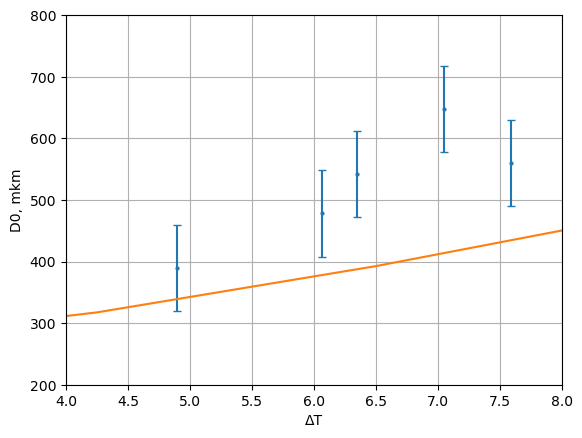

In [11]:
x = np.linspace(2, 11, 5)
graph, ax = plt.subplots()
ax.errorbar(tests['ΔT'], tests['D0, mkm'], yerr=70, fmt='o', capsize=3, markersize=2)
ax.plot(x, 0.25 * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w)))
ax.set_xlabel('ΔT')
ax.set_ylabel('D0, mkm')
ax.grid()
ax.axis([4, 8, 200, 800])

In [40]:
tests.to_excel('output1.xlsx')

In [12]:
def func(x, a):
    return a * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w))
a_opt = 0.25
D0_fit = func(tests['ΔT'], a_opt)
r2 = r2_score(tests['D0, mkm'], D0_fit)
D0_fit

Замер
regstat1    337.320535
regstat2    376.990231
regstat3    433.511758
regstat6    387.109231
regstat9    412.905933
Name: ΔT, dtype: float64

In [13]:
tests0 = pd.read_csv('experimental data.csv', sep=';')
tests0

,Замер,"D mean, mkm","Напряжение, В","Сила тока, А","Температура, °С","Мощность, Вт",Плотность
0,regstat1,389,"1,523","14,4",NaN,"21,9312","7760,509554"
1,regstat2,478,"1,95",23,NaN,"44,85","15870,48832"
2,regstat3,560,"2,555",37,NaN,"94,535","33451,87544"
3,regstat4,1002,3,54,NaN,162,"57324,84076"
4,regstat5,1170,"3,49",69,NaN,"240,81","85212,31423"
5,regstat6,542,"2,24","23,3",NaN,"52,192","18468,50672"
6,regstat7,825,"2,72",41,NaN,"111,52","39462,1373"
7,regstat8,1168,"3,25","67,2",NaN,"218,4","77282,37792"
8,regstat9,647,"2,267","32,6",NaN,"73,9042","26151,52159"
9,regstat10,822,"2,54","41,3",NaN,"104,902","37120,31139"


In [14]:
tests0 = tests0.set_index('Замер')
tests0 = tests0.replace(',', '.', regex=True)
tests0 = tests0.astype(float)
tests0 = tests0.drop(columns='Температура, °С')
tests0.columns = ['D0, mkm', 'U, V', 'I, A', 'P, W', 'q, W/m2']
tests0['ΔT'] = (tests0['q, W/m2'] ** 0.3) / 3

In [16]:
tests0

,"D0, mkm","U, V","I, A","P, W","q, W/m2",ΔT
Замер,,,,,,
regstat1,389.0,1.523,14.4,21.9312,7760.509554,4.896050
regstat2,478.0,1.950,23.0,44.8500,15870.488320,6.068143
regstat3,560.0,2.555,37.0,94.5350,33451.875440,7.589355
regstat4,1002.0,3.000,54.0,162.0000,57324.840760,8.920344
regstat5,1170.0,3.490,69.0,240.8100,85212.314230,10.046839
regstat6,542.0,2.240,23.3,52.1920,18468.506720,6.350505
regstat7,825.0,2.720,41.0,111.5200,39462.137300,7.975041
regstat8,1168.0,3.250,67.2,218.4000,77282.377920,9.756699
regstat9,647.0,2.267,32.6,73.9042,26151.521590,7.049005


(4.0, 11.0, 200.0, 1300.0)

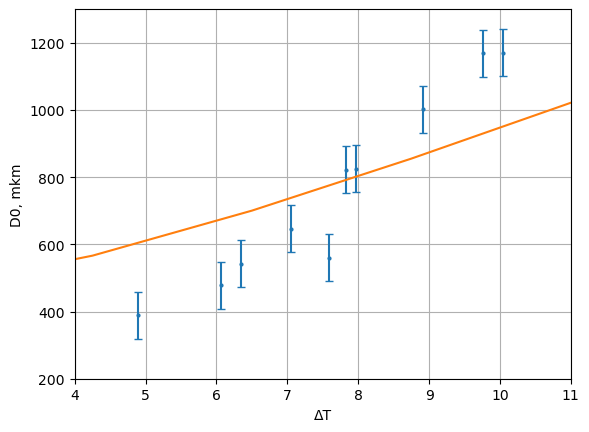

In [18]:
x = np.linspace(2, 11, 5)
graph, axes = plt.subplots()
axes.errorbar(tests0['ΔT'], tests0['D0, mkm'], yerr=70, fmt='o', capsize=3, markersize=2)
axes.plot(x, 0.446 * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w)))
axes.set_xlabel('ΔT')
axes.set_ylabel('D0, mkm')
axes.grid()
axes.axis([4, 11, 200, 1300])

Подбор а:

In [17]:
def func(x, a):
    return a * 1000000 * np.sqrt(1 + 100000 * (((((Cp * x * ρ_w) / (r * ρ_v)) / Pr) ** 2) / Ar)) * math.sqrt(σ / (g * ρ_w))
popt, pcov = curve_fit(func, tests0['ΔT'], tests0['D0, mkm'])
a_opt0 = popt
D0_fit0 = func(tests0['ΔT'], *popt)
r20 = r2_score(tests0['D0, mkm'], D0_fit0)
r20, a_opt0

(0.6042752148116375, array([0.4460613]))